In [ ]:
# 1. 필요한 패키지 설치
!pip install roboflow ultralytics

# 2. Roboflow에서 데이터셋 다운로드
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GGB0zqxfT1wrIqEq3Pq5")
project = rf.workspace("little-kid").project("soccer-detection-eobe6")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 830.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127


Extracting Dataset Version Zip to Soccer-Detection-1 in yolov8:: 100%|██████████| 304/304 [00:00<00:00, 6430.52it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
%%writefile Soccer-Detection-1/data.yaml
train: /content/Soccer-Detection-1/train/images
val: /content/Soccer-Detection-1/valid/images
test: /content/Soccer-Detection-1/test/images

nc: 2
names: ['ball', 'player']

Overwriting Soccer-Detection-1/data.yaml


In [ ]:
# 3. YOLOv8 모델 import 및 학습
from ultralytics import YOLO

# 사전학습된 YOLOv8 모델 불러오기 (nano, small 등 가능)
model = YOLO("yolov8n.pt")  # 가볍고 빠른 모델

# 4. 학습 시작 (data.yaml 경로는 dataset 다운로드 경로 기준)
model.train(data="Soccer-Detection-1/data.yaml", epochs=50, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 69.7MB/s]


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Soccer-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Soccer-Detection-1/train/labels... 125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<00:00, 1127.34it/s]

train: New cache created: /content/Soccer-Detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Soccer-Detection-1/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 1665.78it/s]

val: New cache created: /content/Soccer-Detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.196      4.044      1.063        219        640: 100%|██████████| 8/8 [02:01<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.76s/it]

                   all         14        148    0.00286     0.0338    0.00149   0.000384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.812      2.197     0.9278        231        640: 100%|██████████| 8/8 [01:55<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]

                   all         14        148    0.00497     0.0608    0.00642    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.485      1.471       0.91        203        640: 100%|██████████| 8/8 [01:55<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

                   all         14        148    0.00162     0.0203   0.000831   0.000248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.475      1.408     0.8978        186        640: 100%|██████████| 8/8 [01:47<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]

                   all         14        148     0.0128      0.149     0.0106    0.00517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.403       1.26     0.8852        162        640: 100%|██████████| 8/8 [01:48<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]

                   all         14        148     0.0564      0.723      0.498      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.403      1.228     0.8939        247        640: 100%|██████████| 8/8 [01:52<00:00, 14.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.08s/it]

                   all         14        148     0.0544      0.716      0.453      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.388      1.181     0.8733        259        640: 100%|██████████| 8/8 [01:51<00:00, 13.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]

                   all         14        148     0.0563       0.77      0.412      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.327      1.152      0.869        132        640: 100%|██████████| 8/8 [01:52<00:00, 14.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         14        148     0.0608      0.953      0.425      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.326      1.113     0.8603        194        640: 100%|██████████| 8/8 [01:54<00:00, 14.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         14        148     0.0655       0.98      0.682      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G       1.32      1.083      0.883        206        640: 100%|██████████| 8/8 [01:51<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.16s/it]

                   all         14        148      0.785      0.831      0.835      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.277      1.065     0.8665        156        640: 100%|██████████| 8/8 [02:00<00:00, 15.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

                   all         14        148      0.924      0.743      0.888      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.305      1.035     0.8686        209        640: 100%|██████████| 8/8 [01:53<00:00, 14.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.08s/it]

                   all         14        148      0.913      0.568      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.384      1.088     0.8604        220        640: 100%|██████████| 8/8 [01:52<00:00, 14.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]

                   all         14        148      0.839      0.843      0.854      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G       1.22     0.9843     0.8602        202        640: 100%|██████████| 8/8 [01:53<00:00, 14.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]

                   all         14        148      0.808      0.892      0.892      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.231     0.9687     0.8494        240        640: 100%|██████████| 8/8 [01:54<00:00, 14.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         14        148      0.775      0.933      0.897      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.185     0.9775      0.852        201        640: 100%|██████████| 8/8 [01:59<00:00, 15.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

                   all         14        148      0.789      0.899      0.891       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.133     0.9427     0.8449        125        640: 100%|██████████| 8/8 [01:53<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.74s/it]

                   all         14        148      0.789      0.932      0.892      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.223     0.9268     0.8415        253        640: 100%|██████████| 8/8 [01:56<00:00, 14.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         14        148      0.825      0.894      0.897      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.126      0.906     0.8394        145        640: 100%|██████████| 8/8 [01:56<00:00, 14.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

                   all         14        148      0.824       0.92      0.926      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G        1.2     0.9218     0.8398        217        640: 100%|██████████| 8/8 [01:56<00:00, 14.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         14        148      0.866      0.914      0.924      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.165      0.909      0.848        180        640: 100%|██████████| 8/8 [01:57<00:00, 14.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.90s/it]

                   all         14        148      0.833      0.926      0.917      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.201     0.9239     0.8551        153        640: 100%|██████████| 8/8 [01:56<00:00, 14.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         14        148      0.821      0.927      0.918      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.076     0.8545     0.8375        199        640: 100%|██████████| 8/8 [01:57<00:00, 14.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         14        148      0.834      0.918      0.937      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.091     0.8515     0.8406        231        640: 100%|██████████| 8/8 [01:56<00:00, 14.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

                   all         14        148      0.836      0.932      0.944      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G       1.09     0.8436     0.8356        178        640: 100%|██████████| 8/8 [01:57<00:00, 14.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all         14        148      0.836      0.939      0.949      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.077     0.8324     0.8381        199        640: 100%|██████████| 8/8 [01:58<00:00, 14.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.98s/it]

                   all         14        148       0.84      0.957      0.955      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.068     0.8185     0.8368        203        640: 100%|██████████| 8/8 [01:57<00:00, 14.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all         14        148       0.88      0.889      0.951      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.029     0.8095     0.8296        226        640: 100%|██████████| 8/8 [01:58<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         14        148       0.85      0.899      0.936      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.046       0.82     0.8307        196        640: 100%|██████████| 8/8 [01:56<00:00, 14.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.55s/it]

                   all         14        148      0.861      0.905      0.949       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.029     0.7937     0.8331        247        640: 100%|██████████| 8/8 [01:59<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         14        148       0.86      0.911      0.945      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.017     0.7741     0.8246        190        640: 100%|██████████| 8/8 [01:59<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all         14        148      0.842      0.919      0.931      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.061     0.8173     0.8392        229        640: 100%|██████████| 8/8 [01:58<00:00, 14.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         14        148      0.841      0.926      0.933      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.028     0.7797     0.8248        201        640: 100%|██████████| 8/8 [01:57<00:00, 14.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.38s/it]

                   all         14        148      0.849      0.905       0.94      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.094     0.7864     0.8305        232        640: 100%|██████████| 8/8 [02:01<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         14        148      0.867      0.899      0.935      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.076     0.8016     0.8316        165        640: 100%|██████████| 8/8 [02:00<00:00, 15.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         14        148      0.841      0.928      0.931      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.026     0.7688     0.8265        149        640: 100%|██████████| 8/8 [01:58<00:00, 14.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]

                   all         14        148      0.855      0.914      0.936      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.005     0.7583     0.8246        183        640: 100%|██████████| 8/8 [02:03<00:00, 15.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         14        148      0.842      0.938       0.94      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9912     0.7472     0.8224        193        640: 100%|██████████| 8/8 [01:59<00:00, 14.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]

                   all         14        148      0.867      0.924      0.943      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.9996     0.7436     0.8254        167        640: 100%|██████████| 8/8 [01:59<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all         14        148      0.836      0.931      0.942      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9868     0.7575     0.8175        208        640: 100%|██████████| 8/8 [02:00<00:00, 15.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]

                   all         14        148      0.832      0.939      0.942      0.737


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9502     0.7734     0.8249        142        640: 100%|██████████| 8/8 [01:56<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]

                   all         14        148      0.888      0.885      0.932      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9467     0.7497     0.8276        142        640: 100%|██████████| 8/8 [01:57<00:00, 14.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.90s/it]

                   all         14        148      0.878      0.878      0.919      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.8956     0.7261       0.83        145        640: 100%|██████████| 8/8 [01:57<00:00, 14.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         14        148      0.886      0.905      0.922      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.8975       0.71     0.8194        136        640: 100%|██████████| 8/8 [01:57<00:00, 14.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         14        148      0.873      0.925      0.922      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.8932     0.7145     0.8223        134        640: 100%|██████████| 8/8 [01:57<00:00, 14.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.04s/it]

                   all         14        148      0.893      0.905      0.931       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      0.869     0.6968     0.8108        149        640: 100%|██████████| 8/8 [01:58<00:00, 14.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.30s/it]

                   all         14        148      0.881      0.901      0.938      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.8514      0.677     0.8195        140        640: 100%|██████████| 8/8 [01:56<00:00, 14.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all         14        148      0.866      0.915       0.94      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8553     0.6821      0.816        159        640: 100%|██████████| 8/8 [01:56<00:00, 14.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]

                   all         14        148      0.894      0.885      0.941      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.8705     0.6796     0.8123        120        640: 100%|██████████| 8/8 [01:47<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all         14        148      0.903      0.878       0.94      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8882     0.6888     0.8148        154        640: 100%|██████████| 8/8 [01:43<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.30s/it]

                   all         14        148      0.902      0.873       0.94      0.743



50 epochs completed in 1.681 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


                   all         14        148      0.902      0.873       0.94      0.743
                player         14        148      0.902      0.873       0.94      0.743
Speed: 2.4ms preprocess, 224.2ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796e7242abd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!ls runs/detect/train

args.yaml					   P_curve.png	     train_batch2.jpg
confusion_matrix_normalized.png			   PR_curve.png      train_batch320.jpg
confusion_matrix.png				   R_curve.png	     train_batch321.jpg
events.out.tfevents.1743379683.9b2251d7f3e2.287.0  results.csv	     train_batch322.jpg
F1_curve.png					   results.png	     val_batch0_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					   train_batch1.jpg  weights


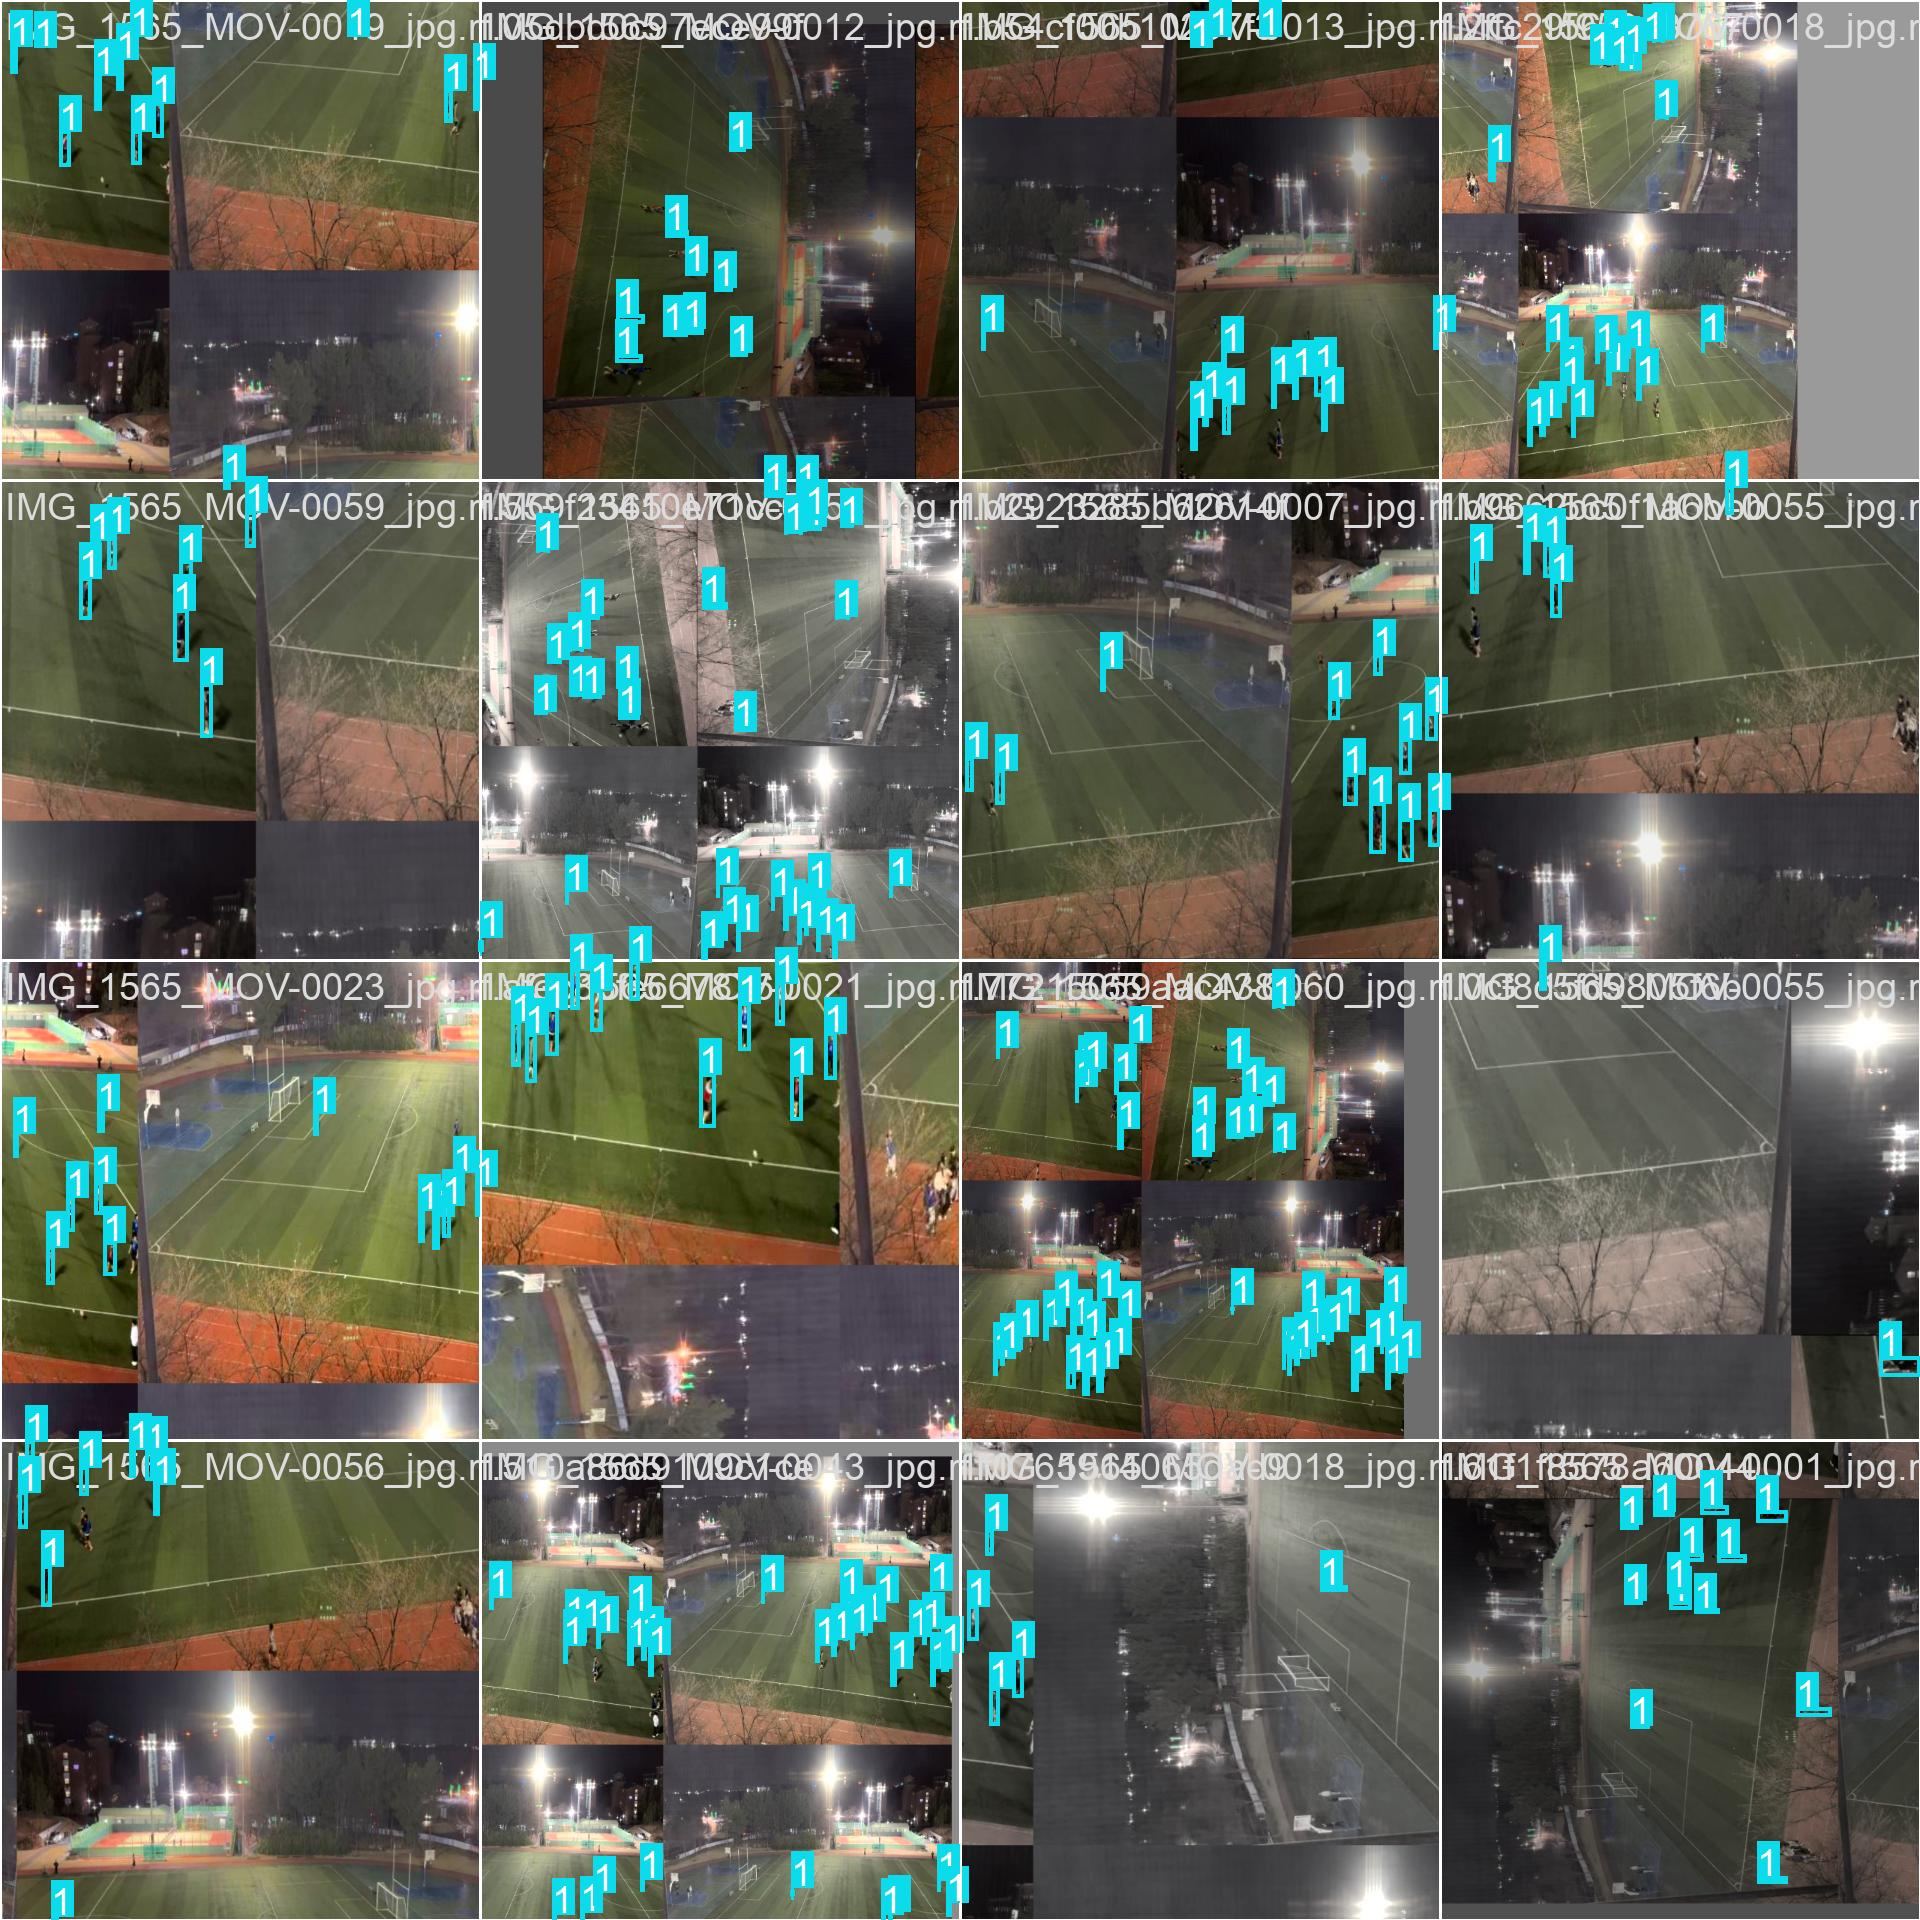

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/train/labels.jpg', width=600)

Image(filename='runs/detect/train/labels_correlogram.jpg', width=600)

Image(filename='runs/detect/train/train_batch0.jpg', width=600)

In [ ]:
# 6. 학습된 모델 저장 (옵션: Google Drive에 저장)
from google.colab import drive
drive.mount('/content/drive')

# 학습된 가중치 저장
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/

Mounted at /content/drive


In [3]:
!pip install roboflow ultralytics
from ultralytics import YOLO

# 학습된 모델 불러오기
model = YOLO("best.pt")

# 예측 수행 (영상 경로는 너의 파일로 바꿔줘야 해)
model.predict(source="predict.mp4", save=True, conf=0.3)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ball', 1: 'player'}
 obb: None
 orig_img: array([[[ 39,  27,  29],
         [ 43,  31,  33],
         [ 51,  39,  41],
         ...,
         [176, 169, 161],
         [179, 172, 164],
         [179, 172, 164]],
 
        [[ 40,  28,  30],
         [ 42,  30,  32],
         [ 43,  31,  33],
         ...,
         [176, 169, 161],
         [179, 172, 164],
         [179, 172, 164]],
 
        [[ 40,  28,  30],
         [ 40,  28,  30],
         [ 37,  25,  27],
         ...,
         [176, 169, 161],
         [179, 172, 164],
         [179, 172, 164]],
 
        ...,
 
        [[ 75,  95,  97],
         [ 75,  95,  97],
         [ 72,  92,  94],
         ...,
         [ 69,  91,  81],
         [ 65,  87,  77],
         [ 64,  86,  76]],
 
        [[ 72,  92,  94],
         [ 72,  92,  94],
         [ 71,  91,  93],
         ...,
       

In [4]:
!ls runs/detect/predict

predict.avi


In [5]:
# .avi → .mp4로 변환
!ffmpeg -i runs/detect/predict/predict.avi -vcodec libx264 runs/detect/predict/predict.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import Video
Video("runs/detect/predict/predict.mp4", embed=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!cp runs/detect/predict/predict.mp4 /content/drive/MyDrive/yolov8_result_video.mp4